# Assignment #2

Please follow instruction below to complete your assignment. 
You are expected to provide:
- IPython notebook
- HTML export of this notebook

This assignment is due 20/05/2022. Please use code blocks to comment and explain your code.

STUDENT ID: [26312
]

In [1]:
%matplotlib inline 
import os, sys
import json

import random
import numpy as np
import networkx as nx
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
from random import seed
from random import randint
import random
# seed random number generator
seed(13)
# Import any other package you may need


## Helper functions for data visualization

In [2]:
def visualize_grid(grid, params=None, figname=None):
    '''
    Generic data visualization function
    
    - grid: 2D numpy array that has integer values
    - params: dictionary of parameters ex: {'dim': (50,50), 'p':0.5} 
    - figname: path and name for a figure file ex: figures/sample_05.pdf
    '''
    cmap = plt.cm.get_cmap('jet', len(np.unique(grid)))
    im = plt.matshow(grid, cmap=cmap, origin='lower', interpolation='none')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks([])
    plt.yticks([])
    
    if params != None:
        plt.title(params, fontsize=10)
    
    if figname != None:
        plt.savefig(figname, dpi=300, bbox_inches='tight')
    

## Simulate percolation

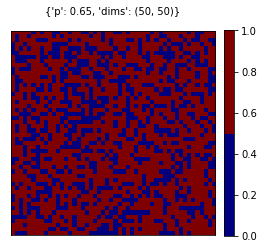

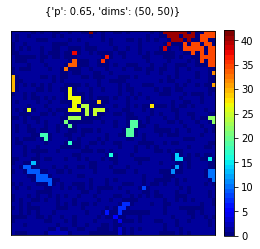

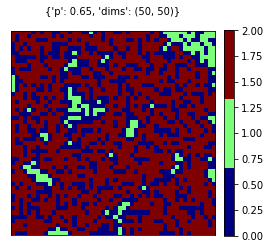

In [3]:
from scipy.ndimage import measurements
def create_grid(dimensions, pthr):
    '''
    Create a grid as 2D numpy array and return the grid
    - dimensions: tuple or array that has height and width of the grid ex: [50,50]
    - pthr: threshold value for occupying a cell
    '''
    grid = np.zeros(dimensions)
    for i in range(0, dimensions[0]):
      for j in range(0, dimensions[1]):
        chance = random.random()
        if chance < pthr :
          value =  1 # random.random() # 1 #randint(1, 1) #changeable 
          grid[i][j] = value

    # FILL HERE
    
    return grid

def find_clusters(grid):
    '''
    Find clusters of occupied cells in the grid
    - grid: 2D numpy array
    
    Return:
    - cGrids: 2D numpy array that has a different integer values for each cluster cells
    - clusters: list of coordinates for each cluster
    '''
    labeled_array , num_clusters = measurements.label(grid)
    dimensions = grid.shape
    arr2 =measurements.find_objects(labeled_array)
    #print(arr2)
    clusters = []
    for i in range (0, num_clusters ):
      my_list = []
      clusters.append(my_list)
    for j in range(0, dimensions[1]):
      for k in range(0, dimensions[0]):
        if 0 < labeled_array[k][j] :
          idx = int(labeled_array[k][j]) -1
          #print(idx)
          clusters[idx].append((j,k))
      
      
      
      #my_list.clear()

    #clusters[0].append("za")
    #cGrids = np.zeros(dimensions)
    #print(labeled_array)
    #print(clusters)
    # FILL HERE
    #print(clusters) 
    #print(labeled_array)
    return labeled_array, sorted(clusters, key=len)


def check_percolation(grid, clusters):
    '''
    Check whether given grid percolated
    - grid: 2D numpy array
    
    Return:
    - grid: 2D numpy array. This function updated the value of grid to reflect percolating component
    - percCluster: coordinates of the cells in the percolating component
    '''
    dimensions = grid.shape
    clusters = sorted(clusters, key=len)
    percCluster = None
    
    # FILL HERE
    for cluster in clusters:
        if len(cluster) >= grid.shape[1]:
            #print("debug")
            #print(cluster)
            min_y_cord = min(cluster, key = lambda item: item[1])[1]
            max_y_cord = max(cluster, key = lambda item: item[1])[1]
            #print(min_y_cord )
            #print(max_y_cord)
            
            if min_y_cord == 0 and max_y_cord == ( dimensions[0] -1 ):
                percCluster = cluster
                break
            
    if percCluster != None:
        #print("PERC VAR")
        for c in percCluster:
            grid[c[1],c[0]] = 2
           
    return grid, percCluster

pval = 0.65
dims = (50,50)
rgrid = create_grid(dims, pval)
visualize_grid(rgrid, {'p':pval, 'dims':dims})

cgrid, clusters = find_clusters(rgrid)
visualize_grid(cgrid, {'p':pval, 'dims':dims})

pgrid, pcluster = check_percolation(rgrid, clusters)
visualize_grid(pgrid, {'p':pval, 'dims':dims})



{'p': 0.05, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.1, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.15000000000000002, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.2, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.25, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.30000000000000004, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.35000000000000003, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.4, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.45, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.5, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.55, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.6000000000000001, 'idx': 0, 'dim': (50, 50), 'isPercolated': True}
{'p': 0.65, 'idx': 0, 'dim': (50, 50), 'isPercolated': True}
{'p': 0.7000000000000001, 'idx': 0, 'dim': (50, 50), 'isPercolated': True}
{'p': 0.75, 'idx': 0, 'dim': (50, 50), 'isPercolated': True}
{'p':

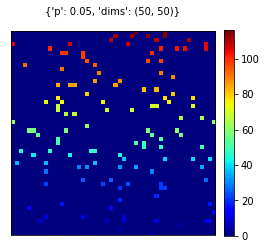

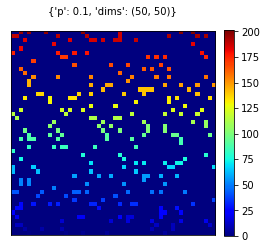

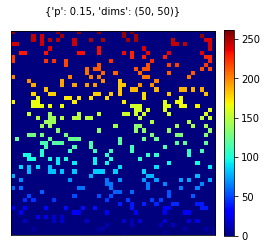

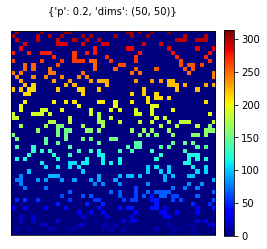

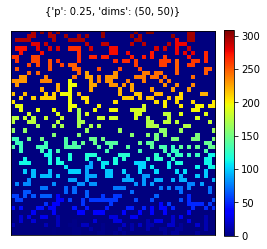

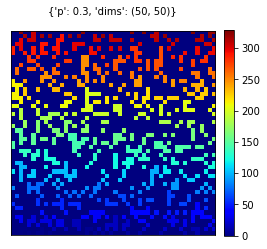

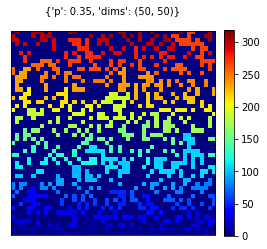

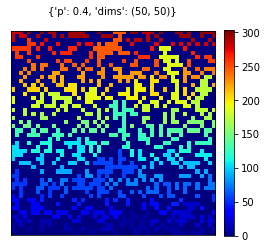

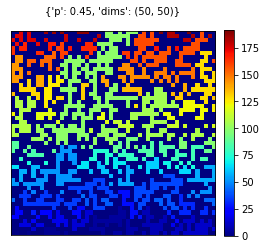

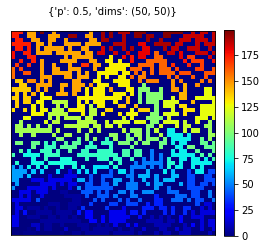

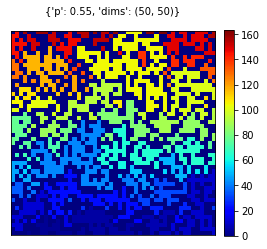

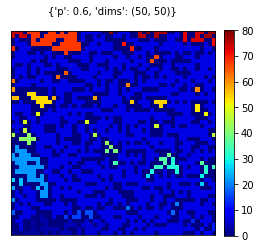

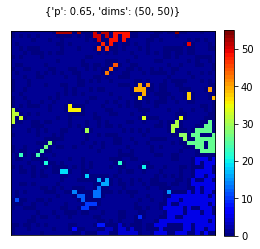

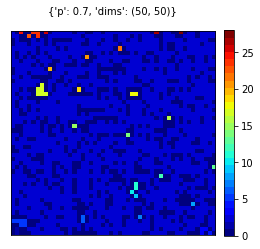

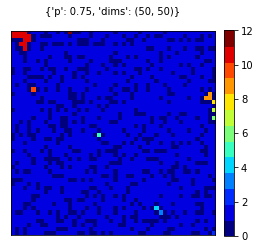

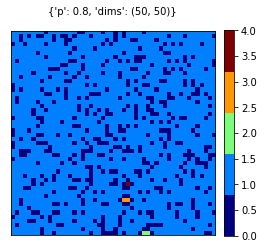

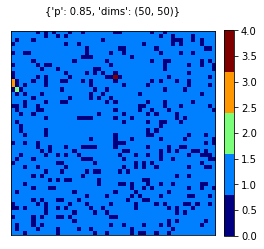

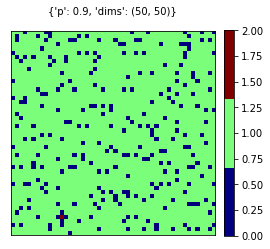

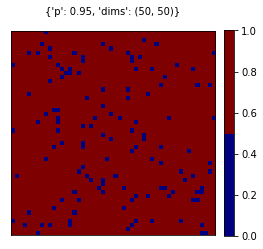

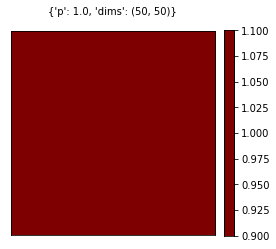

In [4]:
# You can change the parameters below.
NRANDOM = 80
DIMS = (50,50)

pExplore = np.linspace(0,1,21)[1:]
pExpand = np.linspace(0.5,0.65,31)[1:] # Update this array to find more accurate estimation.

expResults = list()
for n in range(NRANDOM):
    
    # You can run simulation for pExplore and pExpand values seperately and repeat pExpand if needed.
    for pval in pExplore:   
    #for pval in pExpand: 
        rgrid = create_grid(dims, pval)
        cgrid, clusters = find_clusters(rgrid)
        pgrid, pcluster = check_percolation(rgrid, clusters)
        
    
        if n == 0:
            # Sample one outcome for each parameter
            visualize_grid(cgrid, {'p':np.round(pval,4), 'dims':dims}, 
                           figname='percvis_p{:.4f}.pdf'.format(pval))
        
        # I recommend keeping all the experiment results in a file, 
        # so that you will have them all before your analysis
        expResults.append({
            'p': pval,
            'idx': n,
            'dim': DIMS,
            'isPercolated': pcluster != None,
            'clusters': clusters,
        })
        
        print({k:v for k,v in expResults[-1].items() if k != 'clusters'})
        
        # Let's keep the latest experiment result on a file
        with open('percolation_experiments.jsons', 'a') as fl:
            fl.write('{}\n'.format(json.dumps(expResults[-1])))
        


## Analyze outputs

In [5]:
expRes = dict()
with open('percolation_experiments.jsons', 'r') as fl:
    for i,line in enumerate(fl):
        expRes[i] = json.loads(line.strip())
expDf = pd.DataFrame.from_dict(expRes, orient='index')

In [6]:
def rounder(data: float):
  return ( round(data,4))
expDf.p = expDf.p.apply(rounder)


In [7]:
expDf.head()


,p,idx,dim,isPercolated,clusters
0,0.05,0,"[50, 50]",False,"[[[9, 0]], [[20, 0]], [[34, 0]], [[26, 1]], [[..."
1,0.10,0,"[50, 50]",False,"[[[4, 0]], [[13, 0]], [[17, 0]], [[23, 0]], [[..."
2,0.15,0,"[50, 50]",False,"[[[7, 0]], [[17, 0]], [[20, 0]], [[27, 0]], [[..."
3,0.20,0,"[50, 50]",False,"[[[5, 0]], [[7, 0]], [[17, 0]], [[28, 0]], [[3..."
4,0.25,0,"[50, 50]",False,"[[[25, 0]], [[27, 0]], [[45, 0]], [[19, 1]], [..."


In [8]:
my_dictionary = {}
p_values = np.linspace(0.05, 1.0 , num = 20)
for probability in p_values:
  probability  = round(probability ,4)
  
  
  #df.head(3)
  counter = (expDf[expDf["p"] == probability   ]['isPercolated'] == True).sum()
  print(counter)
  print(probability )
  my_dictionary[probability ] = ( counter / 80 )


0
0.05
0
0.1
0
0.15
0
0.2
0
0.25
0
0.3
0
0.35
0
0.4
0
0.45
0
0.5
4
0.55
43
0.6
79
0.65
80
0.7
80
0.75
80
0.8
80
0.85
80
0.9
80
0.95
80
1.0


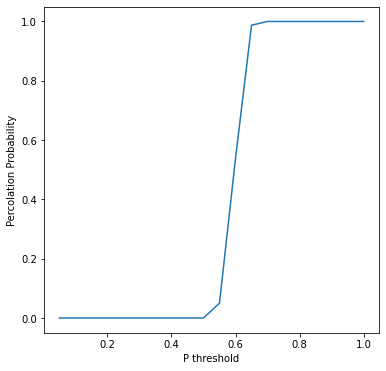

In [15]:
import matplotlib.pylab as plt



myList = my_dictionary.items()
myList = sorted(myList) 
x, y = zip(*myList) 

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(x, y)

plt.xlabel("P threshold")

# set label name of x-axis title
plt.ylabel("Percolation Probability")
# Define x and y axes

plt.show()

In [16]:
my_dictionary2 = {}
p_values = np.linspace(0.05, 1.0 , num = 20)
for probability in p_values:
  probability  = round(probability ,4)
  cluster_counter = 0
  element_counter = 0
  df = expDf.copy()
  #df.head(3)
  df = df[df["p"] == probability ]
  for i in df['clusters']: # number of roes
    
    #print (i) 
    for j in i: #j is a cluster 
      cluster_counter += 1
      #print(j) 
      for k in j: #k is coordinate 
        element_counter += 1
        #print(k)
        #for m in k: # m is either x - y
          #print(m)
          
        
      
  my_dictionary2[probability]   = element_counter /cluster_counter
  #break  
print(cluster_counter)
print(element_counter)
  #counter = (expDf[expDf["p"] == probability   ]['isPercolated'] == True).sum()



80
200000


In [17]:
print(my_dictionary2[0.6])

18.199362767410104


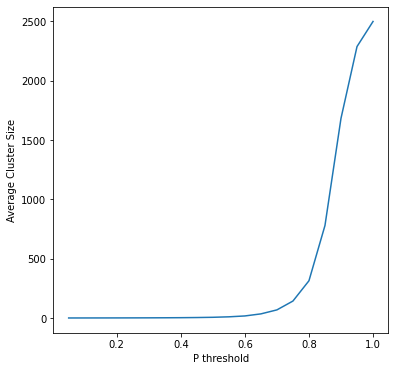

In [18]:
import matplotlib.pylab as plt



myList = my_dictionary2.items()
myList = sorted(myList) 
x, y = zip(*myList) 

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(x, y)


# Define x and y axes
plt.xlabel("P threshold")

# set label name of x-axis title
plt.ylabel("Average Cluster Size")
plt.show()